<center>
    <img src="https://www.ucalgary.ca/themes/ucalgary/ucws_theme/images/UCalgary.svg" width='30%'>
</center>

----------


[comment]: <> (The following line is for the LECTURE title)
<p style="text-align:left;"><font size='6'><b> Deep Learning </b></font></p>

[comment]: <> (The following line is for the TOPIC of the week)
<p style="text-align:left;"><font size='4'><b> Neural Networks - PyTorch Introduction (Iris) </b></font></p>


----------

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

# Data Preparation

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=2)

In [ ]:
# Write code to split the data yourself after scaling it

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris['data']
y = iris['target']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.1)

In [ ]:
# from sklearn.datasets import load_diabetes

# diabetes = load_diabetes()
# X = diabetes['data']
# y = diabetes['target']

In [ ]:
type(X_train)

numpy.ndarray

# Visualization

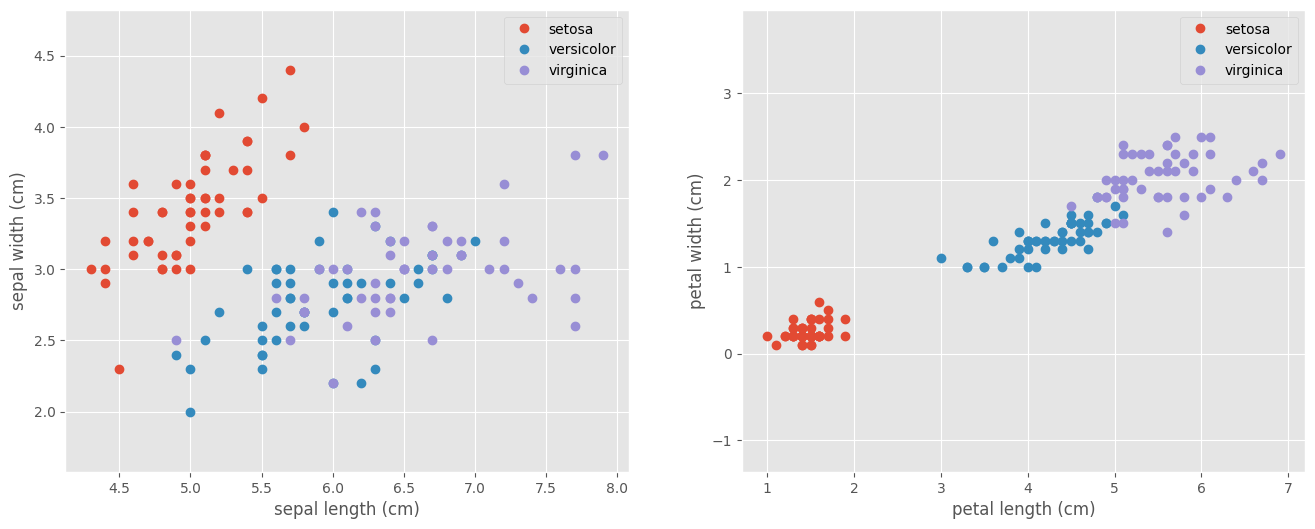

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax1.plot(X_plot[:, 0], X_plot[:, 1],
             linestyle='none',
             marker='o',
             label=target_name)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend();

for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax2.plot(X_plot[:, 2], X_plot[:, 3],
             linestyle='none',
             marker='o',
             label=target_name)
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend();

# PyTorch Models

In [ ]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable

## Construct the NN model class

In [ ]:
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [ ]:
from torch.nn.modules.container import ModuleList
# Exercise

# Build a Module
# We want you to create a 2 layer network
# First output dimension is 100, second is 75.
# Use the relu activation inbetween layers from F.relu
# Output number of classes is 3

class MyModel(nn.Module):

    def __init__(self, input_size, num_classes):
      super(MyModel, self).__init__()
      self.layer1 = nn.Linear(input_size, 100)
      self.layer2 = nn.Linear(100, 75)
      self.layer3 = nn.Linear(75, 50)
      self.layer4 = nn.Linear(50, num_classes)

    def forward(self, x):
      x1 = F.relu(self.layer1(x))
      x2 = F.relu(self.layer2(x1))
      x3 = F.relu(self.layer3(x2))
      out = self.layer4(x3)
      return out

In [ ]:
# Another way to do this is nn.Sequential
# Fill the sizes in
model = torch.nn.Sequential(
    torch.nn.Linear(2,20), # This is equivalent to perceptron
    torch.nn.Tanh(),
    torch.nn.Linear(20,50),
    torch.nn.Tanh(),
    torch.nn.Linear(50,2),
    torch.nn.Softmax(dim=1)).type(torch.DoubleTensor)

In [ ]:
# Build a Model via Sequential
# We want you to create a 2 layer network
# First output dimension is 100, second is 75.
# Use the relu activation inbetween layers from F.relu
# Output number of classes is 3
input_size = 4
num_classes = 3
model = torch.nn.Sequential(
    torch.nn.Linear(input_size, 100),
    torch.nn.ReLU(),
    torch.nn.Linear(100, 75),
    torch.nn.ReLU(),
    torch.nn.Linear(75, 50),
    torch.nn.ReLU(),
    torch.nn.Linear(50, num_classes)
)

## Set the Optimizer and Loss Function

In [ ]:
#dir(torch.optim)

In [ ]:
model = Model(X_train.shape[1])
print(model)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
CE_loss = nn.CrossEntropyLoss()


Model(
  (layer1): Linear(in_features=4, out_features=50, bias=True)
  (layer2): Linear(in_features=50, out_features=50, bias=True)
  (layer3): Linear(in_features=50, out_features=3, bias=True)
)


## Convert Arrays to Tensors

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
X_train_T = Variable(torch.from_numpy(X_train)).float()
y_train_T = Variable(torch.from_numpy(y_train)).long()
X_test_T  = Variable(torch.from_numpy(X_test)).float()
y_test_T  = Variable(torch.from_numpy(y_test)).long()

In [ ]:
type(X_train_T)

torch.Tensor

## Model Training

> What does the `torch.no_grad` do?
    > It deactivates autograd engine which helps reduce the memory usage and speed up computations during inference stage

Write some training code that:

1. tracks all test loss values
2. tracks the test accuracy
3. trains the network


In [ ]:
epochs = 100

# Define variables for tracking loss and acc
test_loss = []
test_acc = []

# Do the training loop
# In the training loop, compute the test loss and accuarcy

for epoch in range(epochs):
    y_pred = model(X_train_T)
    loss = CE_loss(y_pred, y_train_T)
    test_loss.append(loss.item())

    loss.backward()
    # Applies the update step
    optimizer.step()

    with torch.no_grad():
        y_pred = model(X_test_T)
        # Batch x Class Probs

        correct = (torch.argmax(y_pred, dim=1) == y_test_T).type(torch.FloatTensor)
        test_acc.append(correct.mean())

In [ ]:
# Exercise
# Build your own training loop from
# Assume you have no model, optimizer, or loss function yet and create
# them all
# Track your test performance

epochs = 100
lr = 0.001
model = Model(X.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr)
loss_fun = torch.nn.CrossEntropyLoss()

training_loss = []
test_acc = []

for epoch in range(epochs):
  y_pred = model(X_train_T)
  loss = loss_fun(y_pred, y_train_T)

  training_loss.append(loss.item())

  loss.backward()
  optimizer.step()

  with torch.no_grad():
    y_pred = model(X_test_T)

    correct = (torch.argmax(y_pred, dim=1) == y_test_T).type(torch.FloatTensor)
    test_acc.append(correct.mean().item())

print(test_acc)

[0.46666666865348816, 0.46666666865348816, 0.5333333611488342, 0.5333333611488342, 0.5333333611488342, 0.5333333611488342, 0.5333333611488342, 0.5333333611488342, 0.5333333611488342, 0.6666666865348816, 0.7333333492279053, 0.800000011920929, 0.800000011920929, 0.800000011920929, 0.800000011920929, 0.800000011920929, 0.800000011920929, 0.800000011920929, 0.800000011920929, 0.800000011920929, 0.800000011920929, 0.8666666746139526, 0.8666666746139526, 0.8666666746139526, 0.8666666746139526, 0.8666666746139526, 0.8666666746139526, 0.8666666746139526, 0.8666666746139526, 0.8666666746139526, 0.8666666746139526, 0.8666666746139526, 0.8666666746139526, 0.8666666746139526, 0.8666666746139526, 0.8666666746139526, 0.8666666746139526, 0.8666666746139526, 0.8666666746139526, 0.8666666746139526, 0.8666666746139526, 0.8666666746139526, 0.8666666746139526, 0.8666666746139526, 0.8666666746139526, 0.8666666746139526, 0.8666666746139526, 0.8666666746139526, 0.8666666746139526, 0.8666666746139526, 0.86666

In [ ]:
# Exercise
# Build your own training loop from
# Assume you have no model, optimizer, or loss function yet and create
# them all
# Track your test performance

epochs = 100
lr = 0.001
model = Model(X.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr)
loss_fun = torch.nn.CrossEntropyLoss()

training_losses = {"0.002": [], "0.001": [], "0.0005": [], "0.0001": []}
test_acc = []
lrs = [0.002, 0.001, 0.0005, 0.0001]
for lr in lrs:
  optimizer = torch.optim.Adam(model.parameters(), lr)
  c_training_loss = []
  for epoch in range(epochs):
    y_pred = model(X_train_T)
    loss = loss_fun(y_pred, y_train_T)

    c_training_loss.append(loss.item())

    loss.backward()
    optimizer.step()

    # with torch.no_grad():
    #   y_pred = model(X_test_T)

    #   correct = (torch.argmax(y_pred, dim=1) == y_test_T).type(torch.FloatTensor)
    #   test_acc.append(correct.mean().item())

  # print(test_acc)
  training_losses[str(lr)] = c_training_loss

print(training_losses)

{'0.002': [1.090635895729065, 1.0773372650146484, 1.0648247003555298, 1.0526962280273438, 1.0406012535095215, 1.0283128023147583, 1.0158061981201172, 1.0029699802398682, 0.9898520112037659, 0.9764366149902344, 0.9627692103385925, 0.9489266872406006, 0.9349927306175232, 0.9210737347602844, 0.9072849154472351, 0.8938667178153992, 0.8809989094734192, 0.8688563704490662, 0.857604444026947, 0.8472647666931152, 0.8378665447235107, 0.8294434547424316, 0.821988046169281, 0.8154572248458862, 0.8097840547561646, 0.8048893809318542, 0.8006646633148193, 0.7969866394996643, 0.7937313914299011, 0.7907791137695312, 0.7880269289016724, 0.7853569984436035, 0.7826613187789917, 0.7798895835876465, 0.7769930362701416, 0.7739293575286865, 0.7706336975097656, 0.7670745849609375, 0.7632427215576172, 0.7591597437858582, 0.7548341155052185, 0.7502577304840088, 0.7454103231430054, 0.7403616905212402, 0.7351264953613281, 0.7298083901405334, 0.7243897914886475, 0.7189669609069824, 0.7136388421058655, 0.7085403203

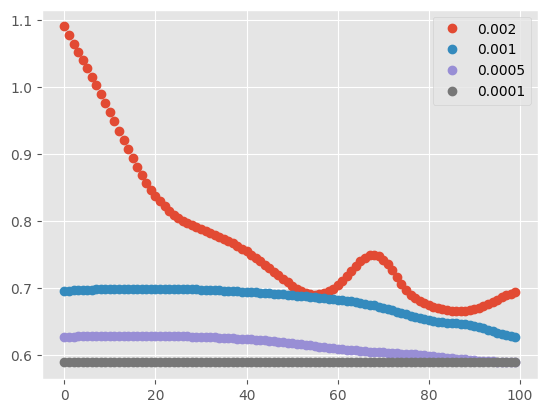

In [ ]:
# fig, ax_lr = plt.subplots(1, 1, figsize=(16, 6))
# fig = plt.plot()
epoch_x = np.arange(epochs)
for lr, losses in training_losses.items():

    plt.plot(epoch_x, losses,
             linestyle='none',
             marker='o',
             label=lr)
# ax_lr.set_xlabel("Epoch")
# ax_lr.set_ylabel("Losses")
# ax_lr.axis('equal')
# ax_lr.set_ylim([0, 2])
# ax_lr.legend();
plt.legend()
plt.show()

In [ ]:
# Solution

epochs  = 100
loss_hist = np.zeros((epochs,))
accuracy_hist = np.zeros((epochs,))

for epoch in range(epochs):
    y_pred = model(X_train_T)
    loss = CE_loss(y_pred, y_train_T)
    loss_hist[epoch] = loss.item()

    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model(X_test_T)
        correct = (torch.argmax(y_pred, dim=1) == y_test_T).type(torch.FloatTensor)
        accuracy_hist[epoch] = correct.mean()

In [ ]:
print(accuracy_hist)

[0.93333334 0.93333334 0.93333334 0.93333334 0.93333334 0.93333334
 0.93333334 0.93333334 0.93333334 0.93333334 0.93333334 0.93333334
 0.93333334 0.93333334 0.93333334 0.93333334 0.93333334 0.93333334
 0.93333334 0.93333334 0.93333334 0.93333334 0.93333334 0.93333334
 0.93333334 0.93333334 0.93333334 0.93333334 0.93333334 0.93333334
 0.93333334 0.93333334 0.93333334 0.93333334 0.93333334 0.93333334
 0.93333334 0.93333334 0.93333334 0.93333334 0.93333334 0.93333334
 0.93333334 0.93333334 0.93333334 0.93333334 0.93333334 0.93333334
 0.93333334 0.93333334 0.93333334 0.93333334 0.93333334 0.93333334
 0.93333334 0.93333334 0.93333334 0.93333334 0.93333334 0.93333334
 0.93333334 0.93333334 0.93333334 0.93333334 0.93333334 0.93333334
 0.93333334 0.93333334 0.93333334 0.93333334 0.93333334 0.93333334
 0.93333334 0.93333334 0.93333334 0.93333334 0.93333334 0.93333334
 0.93333334 0.93333334 0.93333334 0.93333334 0.93333334 0.93333334
 0.93333334 0.93333334 0.93333334 0.93333334 0.93333334 0.9333

## Model Validation

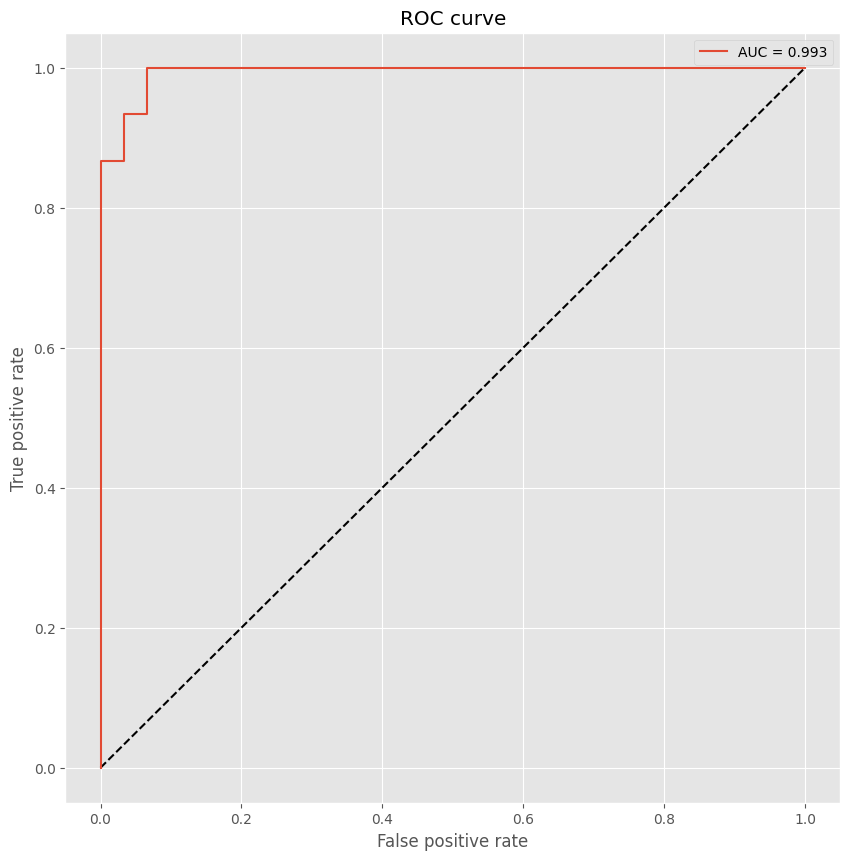

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import OneHotEncoder

plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], 'k--')

# One hot encoding
enc = OneHotEncoder()
Y_onehot = enc.fit_transform(y_test[:, np.newaxis]).toarray()

with torch.no_grad():
    y_pred = model(X_test_T).numpy()
    fpr, tpr, threshold = roc_curve(Y_onehot.ravel(), y_pred.ravel())

plt.plot(fpr, tpr, label='AUC = {:.3f}'.format(auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend();

In [ ]:
# Exercise
# Load CIFAR
# Made a feed forward model
# Do classification on the images

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

batch_size = 32

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2,
                                          drop_last=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform,)
test_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2,
                                        drop_last=True)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
class MyModel(nn.Module):

    def __init__(self, input_size, num_classes):
      super(MyModel, self).__init__()
      hidden_size = 1024
      self.layer1 = nn.Linear(input_size, hidden_size)
      self.layer2 = nn.Linear(hidden_size, hidden_size)
      self.layer3 = nn.Linear(hidden_size, hidden_size)
      self.layer4 = nn.Linear(hidden_size, num_classes)
      self.bn1 = nn.BatchNorm1d(hidden_size)
      self.bn2 = nn.BatchNorm1d(hidden_size)
      self.bn3 = nn.BatchNorm1d(hidden_size)

      torch.nn.init.xavier_normal_(self.layer1.weight)
      torch.nn.init.xavier_normal_(self.layer2.weight)
      torch.nn.init.xavier_normal_(self.layer3.weight)
      torch.nn.init.xavier_normal_(self.layer4.weight)

    def forward(self, x):
      x = F.relu(self.bn1(self.layer1(x)))
      x = F.relu(self.bn2(self.layer2(x)))
      x = F.relu(self.bn3(self.layer3(x)))
      out = self.layer4(x)
      # out = self.layer4(x)
      return out

In [ ]:
num_classes = 10
for i, batch in enumerate(train_loader):

  imgs = batch[0]
  # labels = batch[1]
  # print(imgs.shape)
  input_size = imgs.shape[1] * imgs.shape[2] * imgs.shape[3]
  if i > 1:
    break

  print(input_size)

3072
3072


In [ ]:
epochs = 10
lr = 0.0001
print(input_size)
print(num_classes)
model = MyModel(input_size, num_classes)
model = model.cuda()
optimizer = torch.optim.Adam(model.parameters(), lr)
loss_fun = torch.nn.CrossEntropyLoss()

for epoch in range(epochs):
  for i, batch in enumerate(train_loader):
      imgs = batch[0].type(torch.FloatTensor)
      labels = batch[1].type(torch.LongTensor)
      imgs = imgs.view(batch_size, input_size)

      imgs = imgs.cuda()
      labels = labels.cuda()

      optimizer.zero_grad()
      preds = model(imgs)
      loss = loss_fun(preds, labels)
      loss.backward()
      optimizer.step()

      acc = (torch.argmax(F.softmax(preds,dim=1), dim=1) == labels).type(torch.FloatTensor).mean()
      if i % 100 == 0:
        print("Epoch: {} Loss: {} Acc: {}".format(epoch, loss.item(), acc))

3072
10
Epoch: 0 Loss: 2.8024675846099854 Acc: 0.0
Epoch: 0 Loss: 2.103846311569214 Acc: 0.3125
Epoch: 0 Loss: 1.7235658168792725 Acc: 0.4375
Epoch: 0 Loss: 1.471932291984558 Acc: 0.46875
Epoch: 0 Loss: 1.6697020530700684 Acc: 0.375
Epoch: 0 Loss: 1.603394865989685 Acc: 0.4375
Epoch: 0 Loss: 1.9997546672821045 Acc: 0.3125
Epoch: 0 Loss: 1.621135950088501 Acc: 0.375
Epoch: 0 Loss: 1.6580744981765747 Acc: 0.46875
Epoch: 0 Loss: 1.26732337474823 Acc: 0.59375
Epoch: 0 Loss: 1.5092451572418213 Acc: 0.4375
Epoch: 0 Loss: 1.584450364112854 Acc: 0.3125
Epoch: 0 Loss: 1.4502363204956055 Acc: 0.4375
Epoch: 0 Loss: 1.2679132223129272 Acc: 0.59375
Epoch: 0 Loss: 2.0703678131103516 Acc: 0.25
Epoch: 0 Loss: 1.6380579471588135 Acc: 0.375
Epoch: 1 Loss: 1.4597277641296387 Acc: 0.5625
Epoch: 1 Loss: 1.481335163116455 Acc: 0.5
Epoch: 1 Loss: 1.7375760078430176 Acc: 0.4375
Epoch: 1 Loss: 1.4120960235595703 Acc: 0.5625
Epoch: 1 Loss: 1.75337815284729 Acc: 0.34375
Epoch: 1 Loss: 1.4127196073532104 Acc: 0.5

KeyboardInterrupt: ignored

In [ ]:
# The feed forward network design
class Net(nn.Module):

    def __init__(self, input_size, hidden_size, num_classes):
        super(Net, self).__init__()

        self.fc1 = nn.Linear(input_size,
                             hidden_size)
        self.fc2 = nn.Linear(hidden_size,
                             hidden_size)
        self.fc3 = nn.Linear(hidden_size,
                             num_classes)
        self.bn1 = nn.BatchNorm1d(hidden_size)
        self.bn2 = nn.BatchNorm1d(hidden_size)

        torch.nn.init.xavier_normal_(self.fc1.weight)
        torch.nn.init.xavier_normal_(self.fc2.weight)
        torch.nn.init.xavier_normal_(self.fc3.weight)

    def forward(self, x):
        out = F.relu(self.bn1(self.fc1(x)))
        out = F.relu(self.bn2(self.fc2(out)))
        out = self.fc3(out)

        return out

In [ ]:
# initialize feed forward network
FFnet = Net(3072, 1024, 10).cuda()

# Specify the loss function
criterion = nn.CrossEntropyLoss()

# Specify the optimizer
optimizer = torch.optim.Adam(FFnet.parameters(), lr=0.0001)

# Specify max number of training iterations
max_epochs = 10

# Train the feed forward neural network
epoch_accuracy = np.zeros(max_epochs)

for epoch in range(max_epochs):
    batch_accuracy = []
    for i, batch in enumerate(train_loader):  # Load a batch of images with its (index, data, class)

        images, labels = batch
        images = torch.Tensor(images).type(torch.FloatTensor)
        labels = torch.Tensor(labels).type(torch.LongTensor)
        images = images.view(batch_size, 32*32*3)
        images = images.cuda()
        labels = labels.cuda()

        optimizer.zero_grad()  # Intialize the hidden weight to all zeros
        y_pred = FFnet(images)  # Forward pass: compute the output class given a image
        loss = criterion(y_pred,
                          labels)  # Compute the loss: difference between the output class and the pre-given label
        loss.backward()  # Backward pass: compute the weight
        optimizer.step()  # Optimizer: update the weights of hidden nodes
        if (i + 1) % 100 == 0:  # Logging
            print('Epoch [%d/%d],Loss: %.4f'
                  % (epoch + 1, max_epochs, loss.item()))

        # calculate training accuracy of each epoch

        y_pred_np = y_pred.cpu().data.numpy()

        pred_np = np.argmax(y_pred_np, axis=1)

        pred_np = np.reshape(pred_np, len(pred_np), order='F').reshape((len(pred_np), 1))

        label_np = labels.cpu().data.numpy().reshape(len(labels), 1)

        correct = 0

        for j in range(y_pred_np.shape[0]):
            if pred_np[j, :] == label_np[j, :]:
                correct += 1
        batch_accuracy.append(float(correct) / float(len(label_np)))
    epoch_accuracy[epoch] = np.mean(batch_accuracy)

epoch_number = np.arange(0, max_epochs, 1)

# Plot the training accuracy over epoch
plt.figure()
plt.plot(epoch_number, epoch_accuracy)
plt.title('training accuracy over epoches')
plt.xlabel('Number of Epoch')
plt.ylabel('accuracy')
plt.show()
correct = 0
total = 0

# Calculate testing accuracy
for images, labels in test_loader:
    images = torch.Tensor(images).type(torch.FloatTensor)
    labels = torch.Tensor(labels).type(torch.LongTensor)
    images = images.view(batch_size, 32*32*3)
    images = images.cuda()
    labels = labels.cuda()
    outputs = FFnet(images)
    _, predicted = torch.max(outputs.data,
                              1)  # Choose the best class from the output: The class with the best score
    total += labels.size(0)  # Increment the total count
    correct += (predicted == labels).sum()  # Increment the correct count
print('Accuracy of the network on the 2K test images: %d %%' % (100 * correct / total))